Thie notebook explores the multilayer perceptron for binary text classification for your text classification problem, using the keras library.  Before starting, be sure to install the following versions of tensorflow and keras (for python 3.7):

```sh
pip install tensorflow==1.13.0-rc2
pip install keras==2.2.4
```

In [1]:
import keras
import numpy as np
from sklearn import preprocessing
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from random import choices
import pandas as pd

Using TensorFlow backend.


In [2]:
def read_data(filename):
    X=[]
    Y=[]
    with open(filename, encoding="utf-8") as file:
        for idx,line in enumerate(file):
            cols=line.rstrip().split("\t")
            label=cols[0]
            text=cols[1]
            X.append(text)
            Y.append(label)

    return X, Y

In [3]:
# Change this to the directory with your data (from the CheckData_TODO.ipynb exercise).  
# The directory should contain train.tsv, dev.tsv and test.tsv
directory="../data/text_classification_sample_data"

In [4]:
trainX, trainY=read_data("%s/train.tsv" % directory)
devX, devY=read_data("%s/dev.tsv" % directory)
testX, testY=read_data("%s/test.tsv" % directory)

vectorizer = CountVectorizer(max_features=10000, analyzer=str.split, lowercase=True, strip_accents=None, binary=True)
X_train = vectorizer.fit_transform(trainX)
X_dev = vectorizer.transform(devX)
X_test = vectorizer.transform(testX)

_,vocabSize=X_train.shape

le = preprocessing.LabelEncoder()
le.fit(trainY)

Y_train=le.transform(trainY)
Y_dev=le.transform(devY)
Y_test=le.transform(testY)

In [5]:
def mlp():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(vocabSize,)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
        
    return model

In [10]:
def train_and_evaluate(model, verbose=1, epochs=10):
    if verbose > 0:
        print (model.summary())

    # stop training early when the val_loss on the dev data stops going down
    early_stopping = EarlyStopping(monitor='val_loss',
        min_delta=0,
        patience=5,
        verbose=0, 
        mode='auto')

    # when training, save the model that has the best val_loss on the dev data
    modelName="mymodel.hdf5"
    checkpoint = ModelCheckpoint(modelName, monitor='val_loss', verbose=0, save_best_only=True, mode='min')

    # train
    model.fit(X_train, Y_train, 
                validation_data=(X_dev, Y_dev),
                epochs=epochs,
                verbose=verbose,
                callbacks=[checkpoint, early_stopping])
    
    # load best trained model (from checkpoint)
    model.load_weights(modelName)

    dev_loss, dev_accuracy = model.evaluate(X_dev, Y_dev, batch_size=128, verbose=verbose)
    if verbose > 0:
        print("Dev Accuracy: %.3f" % dev_accuracy)

    test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=128, verbose=verbose)
    if verbose > 0:
        print("Test Accuracy: %.3f" % test_accuracy)

    return dev_accuracy, test_accuracy

Q1: Experiment with the network structure that works best for your binary classification dataset.  Explore the following choices: a.) number of layers in the MLP;  b.) the size of each layer; c.) the activation functions; d.) the use of dropout.  Which architecture performs best on the development data?  Create 5 different models and execute them below.  One of the models should be logistic regression (i.e., an MLP with *no* hidden layers).

In [11]:
def get_model1():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(vocabSize,)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
        
    return model

model1=get_model1()
dev_accuracy, test_accuracy=train_and_evaluate(model1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                100010    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 100,021
Trainable params: 100,021
Non-trainable params: 0
_________________________________________________________________
None
Train on 2723 samples, validate on 257 samples
Epoch 1/10
2723/2723 [==============================] - 1s 302us/step - loss: 0.6703 - acc: 0.5714 - val_loss: 0.6521 - val_acc: 0.6459
Epoch 2/10
2723/2723 [==============================] - 0s 170us/step - loss: 0.5824 - acc: 0.6882 - val_loss: 0.6331 - val_acc: 0.6265
Epoch 3/10
2723/2723 [==============================] - 0s 166us/step - loss

In [ ]:
def get_model2():
    model = Sequential()
    # your model here

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
        
    return model

model2=get_model2()
dev_accuracy, test_accuracy=train_and_evaluate(model2)

In [ ]:
def get_model3():
    model = Sequential()
    # your model here

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
        
    return model

model3=get_model3()
dev_accuracy, test_accuracy=train_and_evaluate(model3)

In [ ]:
def get_model4():
    model = Sequential()
    # your model here

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
        
    return model

model4=get_model4()
dev_accuracy, test_accuracy=train_and_evaluate(model4)

In [12]:
def get_logreg():
    # your model here

    model = Sequential()
    model.add(Dense(1, activation='sigmoid', input_shape=(vocabSize,)))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
        
    return model
    
logreg=get_logreg()
dev_accuracy, test_accuracy=train_and_evaluate(logreg)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 10001     
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________
None
Train on 2723 samples, validate on 257 samples
Epoch 1/10
2723/2723 [==============================] - 1s 322us/step - loss: 0.6524 - acc: 0.6214 - val_loss: 0.6520 - val_acc: 0.6109
Epoch 2/10
2723/2723 [==============================] - 0s 120us/step - loss: 0.5534 - acc: 0.7539 - val_loss: 0.6279 - val_acc: 0.6381
Epoch 3/10
2723/2723 [==============================] - 0s 124us/step - loss: 0.4957 - acc: 0.8101 - val_loss: 0.6133 - val_acc: 0.6693
Epoch 4/10
2723/2723 [==============================] - 0s 112us/step - loss: 0.4559 - acc: 0.8285 - val_loss: 0.6019 - val_acc: 0.6848
Epoch 5/10
2723/2723 [==============================] - 0s 112us/step 

We can generate predictions for a given test set with the `predict_classes` function:

In [13]:
model=logreg
predictions=model.predict_classes(X_test)

Q2: For the single best model you identified in Q1 above, calculate 95% confidence intervals it makes on the test data.

In [14]:
def accuracy(truth, predictions):
    correct=0.
    for idx in range(len(truth)):
        g=truth[idx]
        p=predictions[idx]
        if g == p:
            correct+=1
    return correct/len(truth)

In [15]:
def bootstrap(gold, predictions, metric, B=10000, confidence_level=0.95):
    critical_value=(1-confidence_level)/2
    lower_sig=100*critical_value
    upper_sig=100*(1-critical_value)
    data=[]
    for g, p in zip(gold, predictions):
        data.append([g,p])

    accuracies=[]
    
    for b in range(B):
        choice=choices(data, k=len(data))
        choice=np.array(choice)
        accuracy=metric(choice[:,0], choice[:,1])
        
        accuracies.append(accuracy)
    
    percentiles=np.percentile(accuracies, [lower_sig, 50, upper_sig])
    
    lower=percentiles[0]
    median=percentiles[1]
    upper=percentiles[2]
    
    return lower, median, upper

In [20]:
lower, median, upper=bootstrap(Y_test, predictions, accuracy)
print ("Accuracy: %.3f [%.3f, %.3f]" % (median, lower, upper))

Accuracy: 0.672 [0.641, 0.704]


Q3: Unlike logistic/linear regression, neural networks converge to different solutions as a function of their *initialization* (the random choice of the initial values for parameters).  For the best model that's not logistic regression you identified in Q1 above, train the model 10 times and save the accuracies attained on the development data.  Plot the distribution of dev accuracies using [pandas.DataFrame.plot.density](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html). 

In [17]:
dev_accuracies=[]

model=model1

for i in range(10):
    dev_accuracy, test_accuracy=train_and_evaluate(model, verbose=0)
    dev_accuracies.append(dev_accuracy)
    print("iteration: %s\t%.3f\t%.3f" % (i, dev_accuracy, test_accuracy))

iteration: 0	0.724	0.692
iteration: 1	0.712	0.698
iteration: 2	0.716	0.685
iteration: 3	0.720	0.690
iteration: 4	0.704	0.689
iteration: 5	0.712	0.679
iteration: 6	0.720	0.679
iteration: 7	0.712	0.681
iteration: 8	0.716	0.683
iteration: 9	0.716	0.676


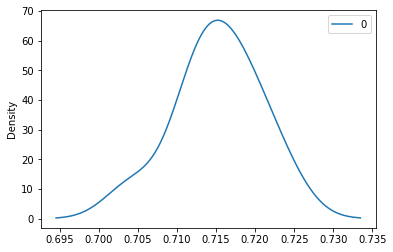

In [19]:
df=pd.DataFrame(dev_accuracies)
ax = df.plot.kde()